# Curve Fitting, Quality of Fit and Data Analysis

In many areas of Materials Science, we are interested in fitting mathematical equations to data. Doing so allows us to obtain parameters that describe the materials and processes we are interested in understanding. In last week's preliminary material, you covered some basic curve fitting in Python using the <code>curve_fit</code> function from <code>scipy.optimize</code> and learnt how to fit some simple functions to data. In this week's class, you will learn how to assess quality of fit, about the dangers of overfitting and how to select appropriate functions to fit to data. We will also look at confidence intervals and data smoothing.

## Linear Regression

The most basic type of curve fitting is linear regression, whereby a straight line is fitted to some data. In this section, we will carry out a simple linear regression on some data obtained in research carried out at the School of Materials in the University of Manchester, then in the following sections we shall introduce some techniques for assessing how well the data is represented by a linear model. The data file <code>E_Type_calibration_01.txt</code> gives the temperature dependence (in degrees Celcius) of the thermopower (in volts per Kelvin) of an E-type thermocouple (a junction of constantan and chromel). As discussed last week, you can use the <code>curve_fit</code> function to fit a function to data. For linear regression, we fit a function of the form $y=m x+c$ (where in this case $y$ is thermopower and $x$ is temperature). Read through and check that you understand the code below.

Note 1: Since the data in volts per Kelvin gives very small numbers, we have plotted the data in microvolts per Kelvin.

Note 2: If you open up the Data folder, you will see that this thermocouple data has an associated ReadMe file. Much of the data you will use over the coming weeks will have such associated files. Make sure you read them before opening up the data.

The fitted function is y = 0.0995 x + 58.5


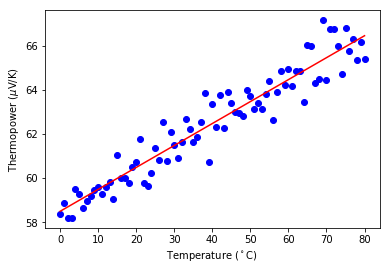

In [1]:
#Import required packages:

import numpy as np #import numpy package as np
import matplotlib.pyplot as plt #import pyplot from matplotlib as plt
from scipy.optimize import curve_fit #import the curve_fit function from scipy.optimize

#Load data:

ThermocoupleData = np.loadtxt('Data/E_Type_calibration_01.txt') 
#create an array called ThermocoupleData that contains the data from the file E_Type_calibration_01.txt
Temp=ThermocoupleData[:,0] #create a list called Temp containing the data for the horizontal axis
Thermopower=1000000*ThermocoupleData[:,1] 
#create a list called Thermopower containing the data for the vertical axis. 
#We have multiplied the Themopower data by 1000000 to express it in uV/K

#Define a linear model and fit it to the data:

def LinearY(x,c,m): #LinearY is a function of x and has parameters c and m
    return m*x+c
pars,cov=curve_fit(LinearY,Temp,Thermopower) 
#use the curve_fit function to find the values of m and c and the covariance matrix associated with the 
#fitting process
m=pars[1] #define m
c=pars[0] #define c
ThermocoupleFit=m*Temp+c #create a list containing data from our fitted function

#Plot the data and the fitted model:

%matplotlib inline 
#define where plots will appear
plt.plot(Temp,Thermopower,'bo') #plot data
plt.plot(Temp,ThermocoupleFit,'-r') #plot fitted function
plt.xlabel('Temperature ($^\circ$C)') #label horizontal axis
plt.ylabel('Thermopower ($\mu$V/K)');#label vertical axis
print('The fitted function is y =',"%.3g" % m,'x +',"%.3g" % c) #print the fitted function

As we can see, a straight line seems to give a good fit to the data, but this statement is rather imprecise and subjective.  In the following section, we shall introduce some methods for assessing the quality of fit quantitatively and objectively.

## Assessing Quality of Fit

### Residuals

The first measure of quality of fit we shall consider is the residual. Imagine we have a data set with pairs of values: for each input $x$ we have an output $y$. $x$ is known as the independent variable and $y$ as the dependent variable. For each value of the input $x$ we can also use our model to predict a value of the output. We denote this prediction $\hat{y}$ to distinguish it from the actual value of the output $y$. Resdiuals, $e$, are defined as the difference between the observed value, $y$, of the dependent variable, $x$, and the predicted value $\hat{y}$:

$$e(x)=y(x)-\hat{y}(x).$$

For our data, the residuals look like this:

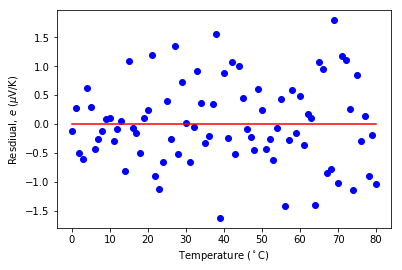

In [2]:
Residuals=Thermopower-ThermocoupleFit #defines a list of residuals
plt.plot(Temp,Residuals,'bo') #plot of residuals
plt.plot(Temp,[0.]*len(Temp),'-r') #plots straight line at e=0
plt.xlabel('Temperature ($^\circ$C)') #label horizontal axis
plt.ylabel('Resdiual, $e$ ($\mu$V/K)'); #label vertical axis

At points at which the fitted function overestimates the observed values, the residuals are negative and at points at which it underestimates them, they are positive. This figure is called a residual plot. As we will see later, looking at the residual plot can sometimes give you clues as to whether you have chosen an appropriate model to fit to your data.

### Absolute Errors

Another important quantity is the absolute error, $e_a$, which is the absolute value of a residual:

$$e_a(x)=|e(x)|.$$

As with the residuals, we can plot the absolute errors:

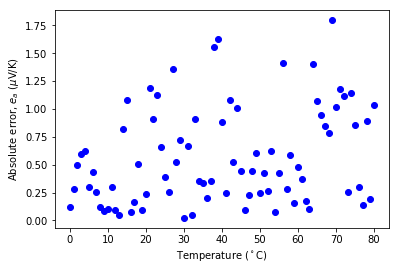

In [3]:
AbsErrors=abs(Residuals) #defines a list of absolute errors
plt.plot(Temp,AbsErrors,'bo') #plot of absolute errors
plt.xlabel('Temperature ($^\circ$C)') #label horizontal axis
plt.ylabel('Absolute error, $e_a$ ($\mu$V/K)'); #label vertical axis

Basically, the smaller the absolute errors, the better the fit is, but what metric should we use to measure them? 

The aim is, effectively, to turn all the numbers in the list of absolute errors into a single number that characterises them in some way. Examples of such measures include the maximum value, the mean and the sum:

In [4]:
MaxAbs=max(AbsErrors) #find the maximum value in AbsErrors
MeanAbs=np.mean(AbsErrors) #find the mean value of AbsErrors
SumAbs=sum(AbsErrors) #find the sum of the entries of AbsErrors

These quantities allow us to make quantitative, objective statements about the quality of fit of the linear regression:

In [5]:
print('The linear regression resulted in a maximum absolute error of',"%.3g" % MaxAbs,'uV/K and a mean absolute error of',"%.3g" % MeanAbs,'uV/K. The sum of the absolute errors is',"%.3g" % SumAbs,'uV/K.')

The linear regression resulted in a maximum absolute error of 1.8 uV/K and a mean absolute error of 0.57 uV/K. The sum of the absolute errors is 46.2 uV/K.


Note: we have expressed the numbers above to three significant figures. It is rarely worth reporting more than this number of significant figures unless you are certain that your measurements are accurate to that level. Bear this in mind when submitting your coursework! Python trims trailing zeroes, so it might seem that only two significant figures have been reported for the maximum and mean absolute error, but the final zero is implicit in both cases.

### Relative errors

Another related quantity is the relative error, $e_r$, which is dimensionless and equal to the absolute error divided by the absolute value of the measured data:

$$e_r(x)=\frac{e_a(x)}{|y(x)|}.$$

This gives us a measure of how big the errors in our model are compared to the size of the data itself. For our linear model, the relative errors are as follows:

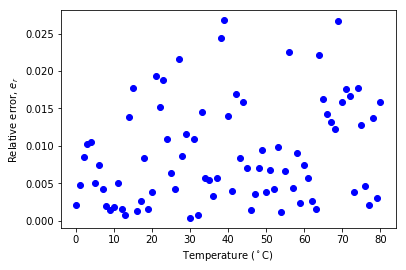

In [6]:
RelErrors=AbsErrors/abs(Thermopower) #defines a list of relative errors
plt.plot(Temp,RelErrors,'bo') #plot of relative errors
plt.xlabel('Temperature ($^\circ$C)') #label horizontal axis
plt.ylabel('Relative error, $e_r$'); #label vertical axis

As with the absolute error, the smaller the relative error, the better, and we can use it to make quantitative statements about the quality of fit that has been achieved:

In [7]:
MaxRel=max(RelErrors) #find the maximum value in RelErrors
MeanRel=np.mean(RelErrors) #find the mean value of RelErrors
SumRel=sum(RelErrors) #find the sum of the entries of RelErrors
print('The linear regression resulted in a maximum relative error of',"%.3g" % MaxRel,'and a mean relative error of',"%.3g" % MeanRel,'. The sum of the relative errors is',"%.3g" % SumRel,'.')

The linear regression resulted in a maximum relative error of 0.0268 and a mean relative error of 0.00906 . The sum of the relative errors is 0.734 .


### Squared Errors

A final important type of direct error measurement is the squared error $e_s$, which is simply the residual squared:

$$e_s(x)=e^2(x).$$

The linear regression resulted in a maximum squared error of 3.23 uV^2/K^2 and a mean squared error of 0.513 uV^2/K^2. The sum of the squared errors is 41.6 uV^2/K^2.


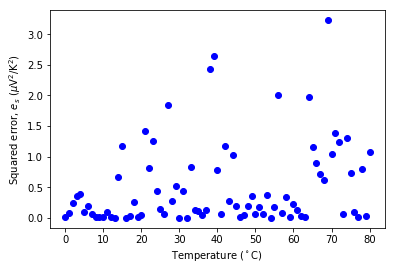

In [8]:
SqrErrors=Residuals**2 #defines a list of squared errors
plt.plot(Temp,SqrErrors,'bo') #plot of squared errors
plt.xlabel('Temperature ($^\circ$C)') #label horizontal axis
plt.ylabel('Squared error, $e_s$ ($\mu$V$^2$/K$^2$)'); #label vertical axis
MaxSqr=max(SqrErrors) #find the maximum value in SqrErrors
MeanSqr=np.mean(SqrErrors) #find the mean value of SqrErrors
SumSqr=sum(SqrErrors) #find the sum of the entries of SqrErrors
print('The linear regression resulted in a maximum squared error of',"%.3g" % MaxSqr,'uV^2/K^2 and a mean squared error of',"%.3g" % MeanSqr,'uV^2/K^2. The sum of the squared errors is',"%.3g" % SumSqr,'uV^2/K^2.')

This quantity is very important in curve fitting as often it is used by fitting alogrithms to select the parameters that "best" fit the data. For example, the <code>curve_fit</code> function used in the example above chooses the values of $m$ and $c$ that minimise the sum of the squared errors.

### Coefficient of Determination ($R^2$ Value)

The final measure of goodness of fit we shall discuss is the coefficient of determination $(R^2)$, which is a number that indicates the proportion of the variance in the data that is predictable from the model being used. It is defined as follows:

$$R^2=1-\frac{SS_{res}}{SS_{tot}},$$

where

$$SS_{res}=\sum e^2(x),\qquad SS_{tot}=\sum (y(x)-\mu)^2,$$

where $\mu$ is the mean value of $y(x)$.

For our data, it can be calculated as follows:

In [9]:
SSres=SumSqr #calculate SSres
mu=np.mean(Thermopower) #calculate mu
SStot=sum((Thermopower-mu)**2) #calculate SStot
Rsqr=1-SSres/SStot #calculate R^2
print('The coefficient of determination associated with this linear regression is',"%.3g" % Rsqr,'.')

The coefficient of determination associated with this linear regression is 0.913 .


The coefficient of determination is always a value between 0 and 1 and the closer it is to 1, the better the fit is. In our example, above, this calculation explains that 91.3% of the variance in the data is predictable from the linear model being used.

#### <span style="color: red"> Task 1:</span> The file 'magnesium_data.txt' gives some stress-strain data for a tensile test performed on magnesium metal. Carry out a linear regression on this data.

Report as many quantitative statements about the quality of fit as you can.

Why are the maximum, mean and sum of the residuals not meaningful measures of the quality of fit?

The figure you obtain should look like this:
<figure>
<img src="Figures/02_T1.jpeg" width='400'>
</figure>

The maximum residual is not a useful measure because this value could be small even if there are large negative errors. The mean and sum of the residuals are not useful measures because they will always be close to zero regardless of how good the fit is.

#### <span style="color: red"> Task 2:</span> Repeat the above linear regression with a simpler fitting function.
We know that stress-strain curves should pass through the point $(0,0)$; therefore, define a new linear function with $c=0$ and fit this to the data.

Use your fitted model to report the Young's modulus of this magnesium sample. Note: since the stress is reported in percent you will need to divide by 100 before carrying out the fit in order to determine the Young's modulus.

The figure you obtain should look like this:
<figure>
<img src="Figures/02_T2.jpeg" width='400'>
</figure>

## Non-linear Regression

Python can also be used to fit non-linear models to data. Last week, we fitted some data on the oxidisation weight gain of a zirconium alloy. The model was of the form

$$W = (aT)^k$$

where $W$ is the weight gain in mg/dm$^2$, $T$ is the exposure time in days and $a$ and $k$ were the fitting parameters. In Task 8, you were asked to fit the first part of the data, whilst assuming that $k=1/2$. You should have produced something like this:

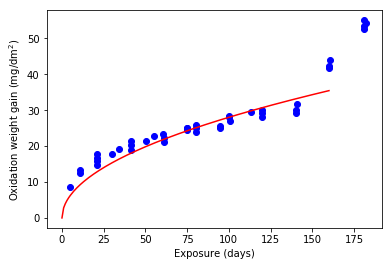

In [12]:
ZrData = np.loadtxt('Data/zr_corrosion.txt',delimiter=',') 
#create an array called ZrData that contains the data from the file zr_corrosion.txt

def SqrtModel(T, a): #SqrtModel is a function of T and has parameter a
    return np.sqrt(a*T)

T = ZrData[0:35,0] #create a list called T that contains the first part of the exposure time data
W = ZrData[0:35,1] #create a list called W that contains the first part of the weight gain data
pars3, cov3 = curve_fit(SqrtModel, T, W) #use the curve_fit function to find the value of a
Exposure=np.linspace(0,160,161) #create a list called Exposure that contains the integers from 0 to 160
WeightFit=SqrtModel(Exposure,pars3[0]) #create a list containing data from our fitted function

plt.plot(ZrData[:,0],ZrData[:,1], 'bo') #plot data
plt.plot(Exposure,WeightFit, 'r') #plot fitted function
plt.xlabel('Exposure (days)') #label horizontal axis
plt.ylabel('Oxidation weight gain (mg/dm$^2$)'); #label vertical axis

## Making Use of Residual Plots

How do we know whether this was an appropriate function to fit to this data? On the one hand, this function came from a theoretical prediction, so it was certainly worthwhile testing this theory; however, by interrogating the residual plot associated with this fit, we get a clue that we can do better. For the linear regression on the thermopower data performed above, the residual plots look fairly random - this could be associated with random noise in the data and so suggests that a linear model was appropriate. There is no evidence of the data being skewed by outliers, or of any important features that the linear function has missed; however, for the square-root fit to the zirconium data, the residual plot looks like this:

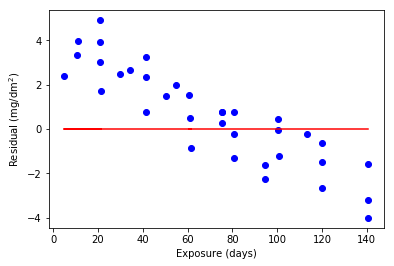

In [13]:
ZrDataFit=SqrtModel(T,pars3[0]) #create a list containing data from our fitted function. 
#Why did we need to define a new list here instead of using WeightFit?
Residuals3=W-ZrDataFit #defines a list of residuals

plt.plot(T,Residuals3,'bo') #plot of residuals
plt.plot(T,[0.]*len(T),'-r') #plots straight line at e=0
plt.xlabel('Exposure (days)') #label horizontal axis
plt.ylabel('Residual (mg/dm$^2$)'); #label vertical axis

There is a clear pattern to this residual plot, showing that the fitted function systematically underestimates the first part of the data and overestimates the second part, which indicates that there might be a more appropriate non-linear model. If we return to our original function (where we let $k$ be a free parameter instead of setting $k=1/2$), the fit and residual plot look like this:

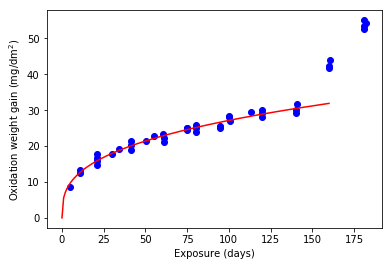

In [14]:
def PowerLaw(T, a, k): #PowerLaw is a function of T and has parameters a and k
    return (a*T)**k
pars4, cov4 = curve_fit(PowerLaw, T, W) #use the curve_fit function to find the values of a and k
WeightFit2=PowerLaw(Exposure,pars4[0],pars4[1]) #create a list containing data from our fitted function

plt.plot(ZrData[:,0],ZrData[:,1], 'bo') #plot data
plt.plot(Exposure,WeightFit2, 'r') #plot fitted function
plt.xlabel('Exposure (days)') #label horizontal axis
plt.ylabel('Oxidation weight gain (mg/dm$^2$)'); #label vertical axis

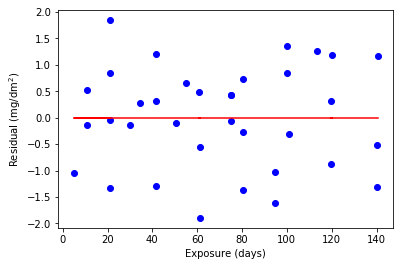

In [15]:
ZrDataFit=PowerLaw(T,pars4[0],pars4[1]) #create a list containing data from our fitted function
Residuals4=W-ZrDataFit #defines a list of residuals

plt.plot(T,Residuals4,'bo') #plot of residuals
plt.plot(T,[0.]*len(T),'-r') #plots straight line at e=0
plt.xlabel('Exposure (days)') #label horizontal axis
plt.ylabel('Residual (mg/dm$^2$)'); #label vertical axis

This looks much more random, indicating that we have done a better job.

#### <span style="color: red"> Task 3:</span> Return to the linear regression of Task 2 and plot the associated residual plot.

Comment on your findings.

The figure you obtain should look like this:
<figure>
<img src="Figures/02_T3.jpeg" width='400'>
</figure>

The residual plot shows a clear pattern, indicating that the linear fit moves between under- and over-estimating the data, so there may be some non-linearity present in the data that hasn't been captured.

#### <span style="color: red"> Task 4:</span> Perform a non-linear regression on the same data and plot the associated residual plot

Try using a function of the form $\sigma=a\epsilon+b\epsilon^2$, where $\sigma$ is the stress, $\epsilon$ is strain and $a$ and $b$ are fitting parameters.

Comment on your findings.

The figures you obtain should look like this:
<figure>
<img src="Figures/02_T4_a.jpeg" width='400'>
<img src="Figures/02_T4_b.jpg" width='400'>
</figure>

### A word of warning

It is not always possible to find a model that removes the appearance of patterns from the residual plot. This is because not all data can be represented well by simple mathematical functions. In cases such as these, you should pick the best model you can and evaluate the quality of fit by other means, such as by looking at the levels of absolute and relative error and the coefficient of determination.

## The Danger of Relying on Coefficient of Determination Alone

You will see many scientific papers where the coefficient of determination is used as a measure of the quality of fit; however, it is possible to achieve very high $R^2$ values even with models that lack some key features. Take the square-root fit to the zirconium alloy data, above, for example. The coefficient of determination for this fit can be calculated as follows:

In [19]:
SqrErrors3=Residuals3**2 #defines a list of squared errors
SSres3=sum(SqrErrors3) #calculate SSres
mu3=np.mean(W) #calculate mu
SStot3=sum((W-mu3)**2) #calculate SStot
Rsqr3=1-SSres3/SStot3 #calculate R^2
print('The coefficient of determination associated with this non-linear regression is',"%.3g" % Rsqr3,'.')

The coefficient of determination associated with this non-linear regression is 0.841 .


This is a reasonably high coefficient of determination, which indicates that 84.1% of the variance in the data can be explained by the square-root model; however, as we have already seen, the square-root model systematically underestimates the first part of the data, then overestimates the second part. If we had not looked at the residual plots, we may have been tempted to say that the square-root model was a good model of this data, but in fact it does not tell the full story. When evaluating the quality of fit a model provides, it is important to take a holistic approach, looking at several different measures to try to tease out the full picture. In fact, for non-linear models it is often best to avoid the coefficient of determination altogether and use other error measurements to assess the quality of fit.

In addition to looking at the residual plots, we may wish to look at how allowing $k$ to vary freely affects the mean absolute error, for example. The square-root model gives the following mean absolute error:

In [20]:
AbsErrors3=abs(Residuals3) #defines a list of absolute errors
MeanAbs3=np.mean(AbsErrors3) #find the mean value of AbsErrors
print('The linear regression resulted in a mean absolute error of',"%.3g" % MeanAbs3,'mg/dm^2.')

The linear regression resulted in a mean absolute error of 1.85 mg/dm^2.


Whereas the power-law model gives the following absolute error:

In [21]:
AbsErrors4=abs(Residuals4) #defines a list of absolute errors
MeanAbs4=np.mean(AbsErrors4) #find the mean value of AbsErrors
print('The linear regression resulted in a mean absolute error of',"%.3g" % MeanAbs4,'mg/dm^2.')

The linear regression resulted in a mean absolute error of 0.793 mg/dm^2.


The mean absolute error for the power-law model is less than half of that for the square-root model. This is a substantial difference which further justifies the use of the power-law model.

## Overfitting

We have seen in some of the examples above that by introducing more free parameters and/or higher order functional dependence to a model, it is possible to obtain an improved fit to data. In the examples above, this was a perfectly reasonable thing to do as the final fitted models gave a significant improvement over the originals, whilst still remaining mathematically simple. It is tempting when fitting data to keep trying to improve the fit by introducing more and more terms; however, this is not always a good idea. As you add more and more terms, the fit will get better, but the insight provided by the model may significantly decrease. Consider this set of sample data:

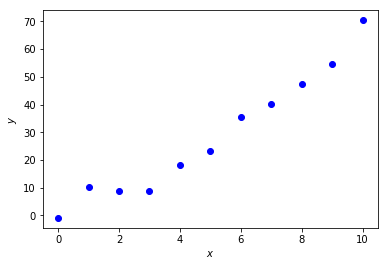

In [22]:
TestData = np.loadtxt('Data/test_data1.txt') #create an array called TestData that contains the data from the file test_data1.txt
plt.plot(TestData[:,0],TestData[:,1],'bo') #plot data
plt.xlabel('$x$') #label horizontal axis
plt.ylabel('$y$');#label vertical axis

Let's try fitting this data with a polynomial function:

$$y=\sum_{i=0}^nA_ix^i$$

where the $A_i$ are our fitting parameters. If we let $n=1$, we have a linear regression:

$$y=A_0+A_1x$$

and the result of this fitting process is plotted below.

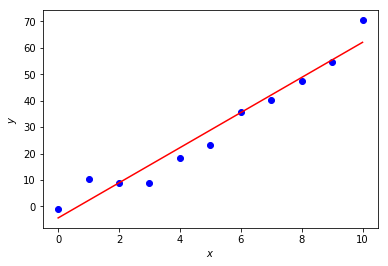

In [23]:
pars6,cov6=curve_fit(LinearY,TestData[:,0],TestData[:,1]) 
#use the curve_fit function to find the values of A0 and A1 and the covariance matrix associated with the 
#fitting process
A0=pars6[0] #define A0
A1=pars6[1] #define A1
TestDataFit=LinearY(TestData[:,0],A0,A1) #create a list containing data from our fitted function

plt.plot(TestData[:,0],TestData[:,1],'bo') #plot data
plt.plot(TestData[:,0],TestDataFit,'-r') #plot fitted function
plt.xlabel('$x$') #label horizontal axis
plt.ylabel('$y$');#label vertical axis

If we let $n=2$, we have a quadratic function 

$$y=A_0+A_1x+A_2x^2$$

and obtain an improved fit:

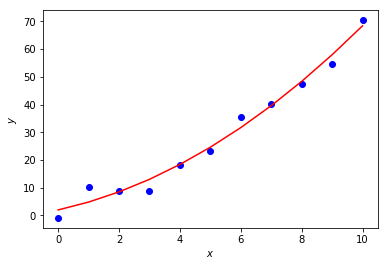

In [24]:
def QuadriaticY(x,A0,A1,A2): #QuadriaticY is a function of x and has parameters A0, A1 and A2
    return A0+A1*x+A2*x**2

pars7,cov7=curve_fit(QuadriaticY,TestData[:,0],TestData[:,1]) 
#use the curve_fit function to find the values of A0 and A1 and the covariance matrix associated with the 
#fitting process
A0=pars7[0] #define A0
A1=pars7[1] #define A1
A2=pars7[2] #define A2
TestDataFit7=QuadriaticY(TestData[:,0],A0,A1,A2) #create a list containing data from our fitted function

plt.plot(TestData[:,0],TestData[:,1],'bo') #plot data
plt.plot(TestData[:,0],TestDataFit7,'-r') #plot fitted function
plt.xlabel('$x$') #label horizontal axis
plt.ylabel('$y$');#label vertical axis

If we keep going, the fit will keep improving and, in fact, if we let $n$ be equal to the number of data points we have, we are guaranteed to obtain a perfect fit (don't worry about the error message):

/home/tshearer/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:715: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


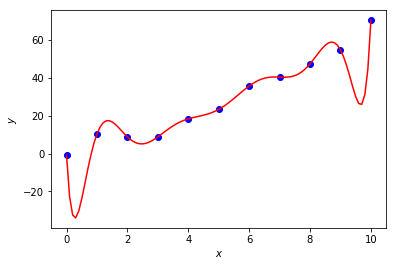

In [25]:
def TenthPowerY(x,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10): 
    #TenthPowerY is a function of x and has parameters A0, A1, A2, A3, A4, A5, A6, A7, A8, A9 and A10
    return A0+A1*x+A2*x**2+A3*x**3+A4*x**4+A5*x**5+A6*x**6+A7*x**7+A8*x**8+A9*x**9+A10*x**10

pars8,cov8=curve_fit(TenthPowerY,TestData[:,0],TestData[:,1]) 
#use the curve_fit function to find the values of A0, A1, A2, A3, A4, A5, A6, A7, A8, A9 and A10 and the 
#covariance matrix associated with the fitting process

A0=pars8[0] #define A0
A1=pars8[1] #define A1
A2=pars8[2] #define A2
A3=pars8[3] #define A2
A4=pars8[4] #define A2
A5=pars8[5] #define A2
A6=pars8[6] #define A2
A7=pars8[7] #define A2
A8=pars8[8] #define A2
A9=pars8[9] #define A2
A10=pars8[10] #define A2
TestDataFit8=TenthPowerY(np.linspace(0,10,101),A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10) 
#create a list containing data from our fitted function

plt.plot(TestData[:,0],TestData[:,1],'bo') #plot data
plt.plot(np.linspace(0,10,101),TestDataFit8,'-r') #plot fitted function
plt.xlabel('$x$') #label horizontal axis
plt.ylabel('$y$');#label vertical axis

However, such a complex model does not provide much insight into the underlying structure in the data!

The key to good data fitting is knowing when to stop. One method is to look at how one of the error metrics changes as the number of free parameters increases. In the plot below we show how the mean absolute error changes as the number of free parameters in the model increases.

Note: don't worry if you don't fully understand the code below, focus on the output.

/home/tshearer/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:715: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


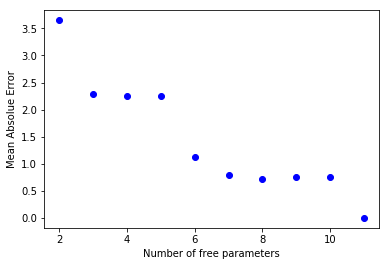

In [26]:
param_bounds1=([-np.inf,-np.inf,0,0,0,0,0,0,0,0,0],[np.inf,np.inf,0.000000000001,0.000000000001,0.000000000001,0.000000000001,0.000000000001,0.000000000001,0.000000000001,0.000000000001,0.000000000001])
polypars1,polycov1=curve_fit(TenthPowerY,TestData[:,0],TestData[:,1], bounds=param_bounds1)
TestDataFitPoly1=TenthPowerY(TestData[:,0],polypars1[0],polypars1[1],polypars1[2],polypars1[3],polypars1[4],polypars1[5],polypars1[6],polypars1[7],polypars1[8],polypars1[9],polypars1[10])
param_bounds2=([-np.inf,-np.inf,-np.inf,0,0,0,0,0,0,0,0],[np.inf,np.inf,np.inf,0.000000000001,0.000000000001,0.000000000001,0.000000000001,0.000000000001,0.000000000001,0.000000000001,0.000000000001])
polypars2,polycov2=curve_fit(TenthPowerY,TestData[:,0],TestData[:,1], bounds=param_bounds2)
TestDataFitPoly2=TenthPowerY(TestData[:,0],polypars2[0],polypars2[1],polypars2[2],polypars2[3],polypars2[4],polypars2[5],polypars2[6],polypars2[7],polypars2[8],polypars2[9],polypars2[10])
param_bounds3=([-np.inf,-np.inf,-np.inf,-np.inf,0,0,0,0,0,0,0],[np.inf,np.inf,np.inf,np.inf,0.000000000001,0.000000000001,0.000000000001,0.000000000001,0.000000000001,0.000000000001,0.000000000001])
polypars3,polycov3=curve_fit(TenthPowerY,TestData[:,0],TestData[:,1], bounds=param_bounds3)
TestDataFitPoly3=TenthPowerY(TestData[:,0],polypars3[0],polypars3[1],polypars3[2],polypars3[3],polypars3[4],polypars3[5],polypars3[6],polypars3[7],polypars3[8],polypars3[9],polypars3[10])
param_bounds4=([-np.inf,-np.inf,-np.inf,-np.inf,-np.inf,0,0,0,0,0,0],[np.inf,np.inf,np.inf,np.inf,np.inf,0.000000000001,0.000000000001,0.000000000001,0.000000000001,0.000000000001,0.000000000001])
polypars4,polycov4=curve_fit(TenthPowerY,TestData[:,0],TestData[:,1], bounds=param_bounds4)
TestDataFitPoly4=TenthPowerY(TestData[:,0],polypars4[0],polypars4[1],polypars4[2],polypars4[3],polypars4[4],polypars4[5],polypars4[6],polypars4[7],polypars4[8],polypars4[9],polypars4[10])
param_bounds5=([-np.inf,-np.inf,-np.inf,-np.inf,-np.inf,-np.inf,0,0,0,0,0],[np.inf,np.inf,np.inf,np.inf,np.inf,np.inf,0.000000000001,0.000000000001,0.000000000001,0.000000000001,0.000000000001])
polypars5,polycov5=curve_fit(TenthPowerY,TestData[:,0],TestData[:,1], bounds=param_bounds5)
TestDataFitPoly5=TenthPowerY(TestData[:,0],polypars5[0],polypars5[1],polypars5[2],polypars5[3],polypars5[4],polypars5[5],polypars5[6],polypars5[7],polypars5[8],polypars5[9],polypars5[10])
param_bounds6=([-np.inf,-np.inf,-np.inf,-np.inf,-np.inf,-np.inf,-np.inf,0,0,0,0],[np.inf,np.inf,np.inf,np.inf,np.inf,np.inf,np.inf,0.000000000001,0.000000000001,0.000000000001,0.000000000001])
polypars6,polycov6=curve_fit(TenthPowerY,TestData[:,0],TestData[:,1], bounds=param_bounds6)
TestDataFitPoly6=TenthPowerY(TestData[:,0],polypars6[0],polypars6[1],polypars6[2],polypars6[3],polypars6[4],polypars6[5],polypars6[6],polypars6[7],polypars6[8],polypars6[9],polypars6[10])
param_bounds7=([-np.inf,-np.inf,-np.inf,-np.inf,-np.inf,-np.inf,-np.inf,-np.inf,0,0,0],[np.inf,np.inf,np.inf,np.inf,np.inf,np.inf,np.inf,np.inf,0.000000000001,0.000000000001,0.000000000001])
polypars7,polycov7=curve_fit(TenthPowerY,TestData[:,0],TestData[:,1], bounds=param_bounds7)
TestDataFitPoly7=TenthPowerY(TestData[:,0],polypars7[0],polypars7[1],polypars7[2],polypars7[3],polypars7[4],polypars7[5],polypars7[6],polypars7[7],polypars7[8],polypars7[9],polypars7[10])
param_bounds8=([-np.inf,-np.inf,-np.inf,-np.inf,-np.inf,-np.inf,-np.inf,-np.inf,-np.inf,0,0],[np.inf,np.inf,np.inf,np.inf,np.inf,np.inf,np.inf,np.inf,np.inf,0.000000000001,0.000000000001])
polypars8,polycov8=curve_fit(TenthPowerY,TestData[:,0],TestData[:,1], bounds=param_bounds8)
TestDataFitPoly8=TenthPowerY(TestData[:,0],polypars8[0],polypars8[1],polypars8[2],polypars8[3],polypars8[4],polypars8[5],polypars8[6],polypars8[7],polypars8[8],polypars8[9],polypars8[10])
param_bounds9=([-np.inf,-np.inf,-np.inf,-np.inf,-np.inf,-np.inf,-np.inf,-np.inf,-np.inf,-np.inf,0],[np.inf,np.inf,np.inf,np.inf,np.inf,np.inf,np.inf,np.inf,np.inf,np.inf,0.000000000001])
polypars9,polycov9=curve_fit(TenthPowerY,TestData[:,0],TestData[:,1], bounds=param_bounds9)
TestDataFitPoly9=TenthPowerY(TestData[:,0],polypars9[0],polypars9[1],polypars9[2],polypars9[3],polypars9[4],polypars9[5],polypars9[6],polypars9[7],polypars9[8],polypars9[9],polypars9[10])
param_bounds10=([-np.inf,-np.inf,-np.inf,-np.inf,-np.inf,-np.inf,-np.inf,-np.inf,-np.inf,-np.inf,-np.inf],[np.inf,np.inf,np.inf,np.inf,np.inf,np.inf,np.inf,np.inf,np.inf,np.inf,np.inf])
polypars10,polycov10=curve_fit(TenthPowerY,TestData[:,0],TestData[:,1], bounds=param_bounds10)
TestDataFitPoly10=TenthPowerY(TestData[:,0],polypars10[0],polypars10[1],polypars10[2],polypars10[3],polypars10[4],polypars10[5],polypars10[6],polypars10[7],polypars10[8],polypars10[9],polypars10[10])
ResidualsPoly1=TestData[:,1]-TestDataFitPoly1
AbsErrorsPoly1=abs(ResidualsPoly1)
MeanAbsPoly1=np.mean(AbsErrorsPoly1)
ResidualsPoly2=TestData[:,1]-TestDataFitPoly2
AbsErrorsPoly2=abs(ResidualsPoly2)
MeanAbsPoly2=np.mean(AbsErrorsPoly2)
ResidualsPoly3=TestData[:,1]-TestDataFitPoly3
AbsErrorsPoly3=abs(ResidualsPoly3)
MeanAbsPoly3=np.mean(AbsErrorsPoly3)
ResidualsPoly4=TestData[:,1]-TestDataFitPoly4
AbsErrorsPoly4=abs(ResidualsPoly4)
MeanAbsPoly4=np.mean(AbsErrorsPoly4)
ResidualsPoly5=TestData[:,1]-TestDataFitPoly5
AbsErrorsPoly5=abs(ResidualsPoly5)
MeanAbsPoly5=np.mean(AbsErrorsPoly5)
ResidualsPoly6=TestData[:,1]-TestDataFitPoly6
AbsErrorsPoly6=abs(ResidualsPoly6)
MeanAbsPoly6=np.mean(AbsErrorsPoly6)
ResidualsPoly7=TestData[:,1]-TestDataFitPoly7
AbsErrorsPoly7=abs(ResidualsPoly7)
MeanAbsPoly7=np.mean(AbsErrorsPoly7)
ResidualsPoly8=TestData[:,1]-TestDataFitPoly8
AbsErrorsPoly8=abs(ResidualsPoly8)
MeanAbsPoly8=np.mean(AbsErrorsPoly8)
ResidualsPoly9=TestData[:,1]-TestDataFitPoly9
AbsErrorsPoly9=abs(ResidualsPoly9)
MeanAbsPoly9=np.mean(AbsErrorsPoly9)
ResidualsPoly10=TestData[:,1]-TestDataFitPoly10
AbsErrorsPoly10=abs(ResidualsPoly10)
MeanAbsPoly10=np.mean(AbsErrorsPoly10)
ErrorPlot=[MeanAbsPoly1,MeanAbsPoly2,MeanAbsPoly3,MeanAbsPoly4,MeanAbsPoly5,MeanAbsPoly6,MeanAbsPoly7,MeanAbsPoly8,MeanAbsPoly9,MeanAbsPoly10]
plt.plot(np.linspace(2,11,10),ErrorPlot,'bo')
plt.xlabel('Number of free parameters')
plt.ylabel('Mean Absolue Error');

We can see that there is quite a lot of value in going from a linear to a quadratic model (2 to 3 free parameters) and from going from a quartic to a quintic model (5 to 6 free parameters); however, a model with 6 free parameters is very complex, so it would probably be best to initially look at a quadratic model. Note that beyond those two jumps in mean absolute error, there are diminishing returns from adding in extra terms. 

The next step would be to look at the residual plots to confirm whether it would be worth making the model any more complex. Here are the residuals from the linear model:

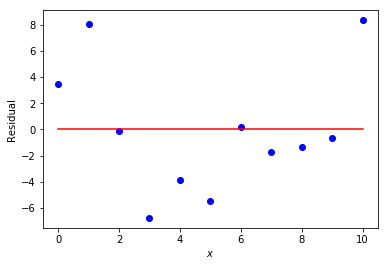

In [27]:
plt.plot(TestData[:,0],ResidualsPoly1,'bo') #plot of residuals
plt.plot(TestData[:,0],[0.]*len(TestData[:,0]),'-r') #plots straight line at e=0
plt.xlabel('$x$') #label horizontal axis
plt.ylabel('Residual'); #label vertical axis

It is hard to say for sure when there are only 10 data points, but it could be argued that there is a pattern in this residual plot, with the model underestimating, then overestimating, before underestimating again. Here are the residuals from the quadratic model:

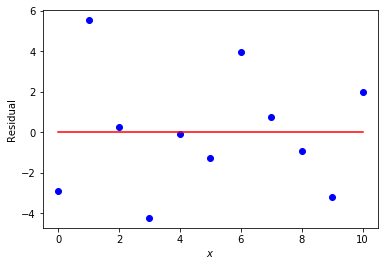

In [28]:
plt.plot(TestData[:,0],ResidualsPoly2,'bo') #plot of residuals
plt.plot(TestData[:,0],[0.]*len(TestData[:,0]),'-r') #plots straight line at e=0
plt.xlabel('$x$') #label horizontal axis
plt.ylabel('Residual'); #label vertical axis

In this case, it is fairly easy to convince yourself that this is random noise, indicating that going from a linear to a quadratic model was worthwhile. 

Interestingly, if you go too far with your fitting, some strange symmetries start to appear in the residuals. These are the residuals for a ninth power model:

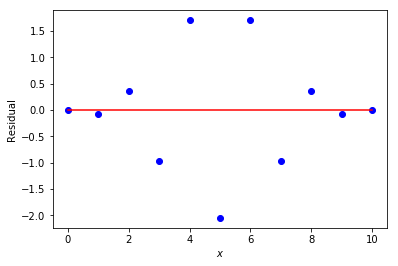

In [29]:
plt.plot(TestData[:,0],ResidualsPoly9,'bo') #plot of residuals
plt.plot(TestData[:,0],[0.]*len(TestData[:,0]),'-r') #plots straight line at e=0
plt.xlabel('$x$') #label horizontal axis
plt.ylabel('Residual'); #label vertical axis

Try editing the code above to look at the residuals for the third to eighth power models to see how these symmetries start to appear.

## Selecting an Appropriate Function

The best way to choose a function to fit to your data is to base this choice on some underlying theory. For example, if the data is stress-strain data on a linear-elastic material, you should choose a linear function to fit the data. You will not always have this information, however, and in fact sometimes new theories are developed in order to explain the structure of unexpected data. When you haven't got a reason to select a particular function _a priori_, it is good to have a suite of appropriate functions to choose from. The polynomial function mentioned above and the power-law used to fit the ziroconium alloy data are exaples of these functions, but there are other fundamental functions you should be aware of:

### Exponential decay

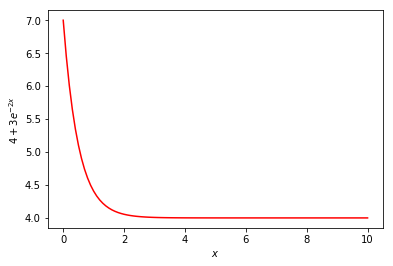

In [30]:
plt.plot(np.linspace(0,10,101),4+3*np.exp(-2*np.linspace(0,10,101)),'-r') #plot exponentially decaying function
plt.xlabel('$x$') #label horizontal axis
plt.ylabel('$4+3e^{-2x}$'); #label vertical axis

A function that decays rapidly to a constant value $a$ (in other words it has an asymptote at $y=a$), is equal to $a+b$ at $x=0$ and whose rate of decay is controlled by the positive parameter $c$ looks like this:

$$y(x)=a+b\exp(-cx)$$

If $b$ is negative, this equation tends to $a$ from below:

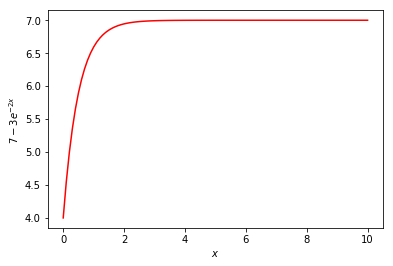

In [31]:
plt.plot(np.linspace(0,10,101),7-3*np.exp(-2*np.linspace(0,10,101)),'-r') 
#plot exponentially decaying function asymptoting from below
plt.xlabel('$x$') #label horizontal axis
plt.ylabel('$7-3e^{-2x}$'); #label vertical axis

Note that this is qualitatively different from the power-law model. The power-law model tends to infinity as $x$ tends to infinity, whereas this model tends to $a$.

If you plot a decaying exponential function that tends to zero (i.e. with $a=0$) as a log plot, you will obtain a straight line with negative gradient; therefore, it is often useful to plot data as a log plot before attempting to fit a function to it:

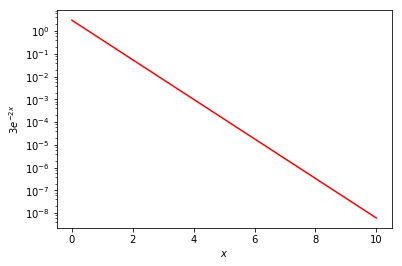

In [32]:
plt.semilogy(np.linspace(0,10,101),3*np.exp(-2*np.linspace(0,10,101)),'-r') #plot exponentially decaying function
plt.xlabel('$x$') #label horizontal axis
plt.ylabel('$3e^{-2x}$'); #label vertical axis

Exponential decay is often seen in stress relaxation tests in which material samples are stretched to a fixed strain and then the stress is measured as a function of time. Sometimes there is evidence of two or more distinct time-scales being present in the relaxation behaviour. These additional time scales can be accounted for by including additional exponential functions; for example, a material with two relaxation time scales may exhibit the following stress relaxation function:

$$\sigma(x)=a+b\exp(-ct)+d\exp(-et),$$

where $\sigma$ is the stress, $t$ is time and $a$ , $b$, $c$, $d$ and $e$ are fitting parameters.

### Exponential growth

An exponentially growing function will appear as a straight line with positive gradient on a log plot:

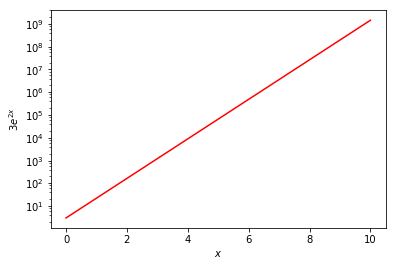

In [33]:
plt.semilogy(np.linspace(0,10,101),3*np.exp(2*np.linspace(0,10,101)),'-r') #plot exponentially growing function
plt.xlabel('$x$') #label horizontal axis
plt.ylabel('$3e^{2x}$'); #label vertical axis

Such a function takes the form
$$y(x)=a\exp(b t),$$
where $b$ is positive.

Exponential growth is exhibited by lab grown cells - the number of cells present in a petri dish increases exponentially as a function of time.

### Oscillatory functions

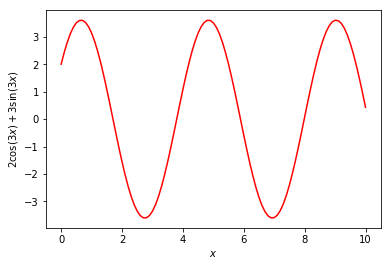

In [34]:
plt.plot(np.linspace(0,10,101),2*np.cos(3*np.linspace(0,10,101)/2)+3*np.sin(3*np.linspace(0,10,101)/2),'-r') #plot sinusoidal function
plt.xlabel('$x$') #label horizontal axis
plt.ylabel('$2\cos(1.5x)+3\sin(1.5x)$'); #label vertical axis

When the data looks sinusoidal, you can use a function like this:

$$y(x)=a\cos(cx)+b\sin(cx).$$

Physical vibrations of a piece of equipment can sometimes cause sinusoidal oscillations to appear in data. If this oscillitory noise is detected, it can be removed to clean up the data.

#### <span style="color: red"> Task 5:</span> Import the data in the file 'test_data2.txt' and fit an appropriate function to it. 

First plot the data as a log plot to help you choose the function, then print the fitted function and plot it along with the original data as a standard plot.

The figures you obtain should look like this:
<figure>
<img src="Figures/02_T5_a.jpeg" width='400'>
<img src="Figures/02_T5_b.jpeg" width='400'>
</figure>

## Confidence Intervals

For real data sets, there will always be some uncertainty in the values of the parameters that fit the data. If you are interested in the true values of these parameters, it is a good idea to report confidence intervals on their values. In the example below, we report 95% (approximate) confidence intervals on the values of the parameters $a$ and $k$ that were used in the power-law model fit to the zirconium data, above. This gives us two ranges of values (one for $a$ and one for $k$) that are compatible with the data and that we are (approximately) 95% certain that the true values of $a$ and $k$ lie within. You may wish to refer to the discussion beginning on page 610, in Chapter 9 of [REGRESSION ANALYSIS: Concepts and Applications](http://www.stat.colostate.edu/regression_book/) by Graybill and Iyer for further details on where the equation for the confidence intervals comes from.

In [37]:
#Just as a reminder, here is the code we used to fit a power law to the zirconium data:
ZrData = np.loadtxt('Data/zr_corrosion.txt',delimiter=',') 
#create an array called ZrData that contains the data from the file zr_corrosion.txt
T = ZrData[0:35,0] #create a list called T that contains the first part of the exposure time data
W = ZrData[0:35,1] #create a list called W that contains the first part of the weight gain data
def PowerLaw(T, a, k): #PowerLaw is a function of T and has parameters a and k
    return (a*T)**k
pars4, cov4 = curve_fit(PowerLaw, T, W) #use the curve_fit function to find the values of a and k

#Now we calculate confidence intervals for the parameters:
from scipy.stats import t #import the t-values functionality from scipy.stats
alpha = 0.05 #95% confidence interval = 100*(1-alpha)
n = len(W) #number of data points in W
p = len(pars4) #number of parameters
dof = max(0, n - p) #number of degrees of freedom
tval = t.ppf(1.0-alpha/2., dof) #t-value for the given degrees of freedom and confidence level
var = np.diag(cov4) #the diagonal of the covariance matrix gives the variance of each parameter
sigma = var**0.5 #sigma is the square root of the variance
lb = pars4 - sigma*tval #the lower bounds
ub = pars4 + sigma*tval #the upper bounds
print('A 95% confidence interval for a is',"%.3g" % lb[0],'-',"%.3g" % ub[0],'.')
print('A 95% confidence interval for k is',"%.3g" % lb[1],'-',"%.3g" % ub[1],'.')

A 95% confidence interval for a is 51.6 - 256 .
A 95% confidence interval for k is 0.318 - 0.367 .


Note:  We haven't reported the units of the parameters in this instance. This is because for this model, the units of $a$ and $k$ depend upon each other.

To understand what we have just done, we need to know a bit more about the fitting process. The <code>curve_fit</code> command told us the values of $a$ and $k$ that gave the minimum mean squared error when fitting the data in the list <code>pars4</code>. Any parameter values that are close to these values, whilst not being optimal, will also give a fairly reasonable fit. As you move away from these values, the fit gets worse. The variances of these parameters (which are the reported by <code>curve_fit</code> on the diagonals of the covarianve matrix <code>cov4</code>) tell you how quickly the quality of fit decreases as you move each parameter away from its optimal value. Let's have a look at the values of the variances for $a$ and $k$:

In [38]:
print('The variance of a is',"%.0f" % var[0],'and the variance of k is',"%.3g" % var[1],'.')

The variance of a is 2521 and the variance of k is 0.000142 .


As we can see, the variance of $a$ is large and the variance of $k$ is small. This means that as you move $a$ away from its reported optimal value, the quality of fit decreases slowly, whereas as you move $k$, the quality decreases much more rapidly.

Now, since all experimental data is subject to some level of uncertainty and noise, you will find that it never all perfectly lies on a fitted curve (unless you have overfitted). Therefore, there will be some uncertainty in the parameters of the fitted curve. The variance gives a measure of the range within which the true values of the parameters are likely to lie. It transpires that the true values of the parameters are governed by [t-distributions](https://en.wikipedia.org/wiki/Student%27s_t-distribution). We will study probability density functions in more depth next week, but for now all you need to know is that the area under the probability distribution between $a=a_0$ and $a=a_1$ gives the probabiliy that the true value of $a$ lies between $a_0$ and $a_1$. The predicted probability density function for the parameter $a$ looks like this (don't worry about understanding the code below, it will make more sense after next week's notebook):

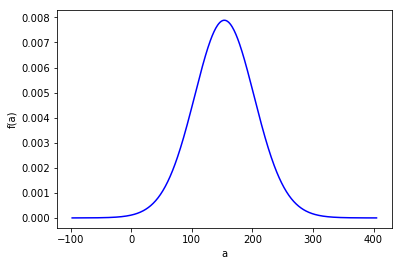

In [39]:
from scipy import stats
x=np.linspace(pars4[0]-5*sigma[0],pars4[0]+5*sigma[0],501)
sy=stats.t.pdf(x,dof,pars4[0],sigma[0])
plt.plot(x,sy,'-b') 
plt.xlabel('a')
plt.ylabel('f(a)');

The t-value for $\alpha=0.05$ tells us within how many standard deviations 95% of the area under the t-distribution lies. The t-value for general $\alpha$ tells us within how many standard deviations $(1-\alpha)/100~\%$ of the area under the t-distribution lies. We are interested in a 95% confidence interval, so the first argument of the t-value will be 0.975 (since 2.5% of the discounted data will lie to either side of the range we keep, we will have discounted 5% of the data in total, leaving us with a 95% confidence interval):

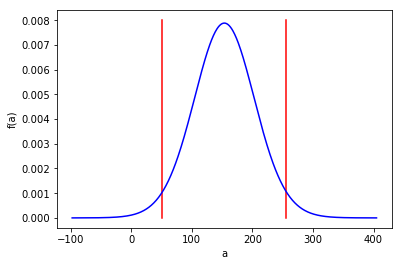

In [40]:
x=np.linspace(pars4[0]-5*sigma[0],pars4[0]+5*sigma[0],501)
sy=stats.t.pdf(x,dof,pars4[0],sigma[0])
al1 = np.linspace(lb[0],lb[0],2)
a2 = np.linspace(0,0.008,2)
au1 = np.linspace(ub[0],ub[0],2)
plt.plot(al1,a2,'-r')
plt.plot(au1,a2,'-r') 
plt.plot(x,sy,'-b') 
plt.xlabel('a')
plt.ylabel('f(a)');

95% of the area under this curve lies within the red lines, therefore, the red lines represent a 95% confidence interval for $a$.

#### <span style="color: red"> Task 6:</span> Calculate a 99% confidence interval for the Young's modulus of the magnesium sample investigated in Task 2.

For this purpose, you can assume that the linear model is valid.

## Data Smoothing

The final topic we will consider this week is data smoothing. Data smoothing can be used to remove noise from data in order to allow underlying patterns to stand out and to make data more attractive for presentation. There are several ways to do this; we shall discuss applying moving average and Gaussian filters. Let's return to the thermocouple data above. If we we plot this data as a line, it is clearly very noisy:

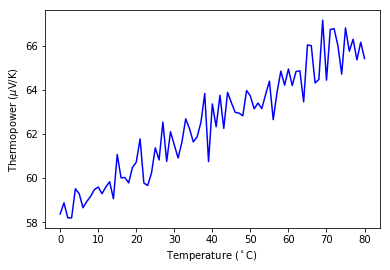

In [42]:
plt.plot(Temp,Thermopower,'-b') #plot initial data
plt.xlabel('Temperature ($^\circ$C)') #label horizontal axis
plt.ylabel('Thermopower ($\mu$V/K)');#label vertical axis

### Moving average filter

There are two main types of moving averages: weighted and unweighted. Unweighted moving averages divide your data into blocks of a given length $n$ (often called the window) and give a list of the means of these blocks. So if your data is a list of numbers $(a,b,c,d,e)$ and you use a window of length 3, then an unweighted moving average will produce this new list:

$$\left(\frac{a+b+c}{3},\frac{b+c+d}{3},\frac{c+d+e}{3}\right).$$

Note that the original data set was of length 5 and using a moving average with window length 3 we ended up with a filtered data set of length 3.

#### <span style="color: red"> Task 7:</span> Calculate the filtered length of a data set of original length $m$ that has a moving average of window length $n$ applied to it.

First consider some numerical examples before moving onto the general case, e.g. what is the filtered length of a data set of original length 10 that had a moving average of window length 3 applied to it? What about a data set of original length 10 that had a moving average of window length 4 applied to it?

We can implement an unweighted moving average in Python as follows:

In [43]:
def movingaverage(values,window): #define a function called movingaverage that has arguments called values and window
    weights = np.repeat(1.0,window)/window #create a list of weights to convolve the data with
    smas = np.convolve(values,weights,'valid') #convolve the data with the weights
    return smas #output the filtered data

Here is a moving average filter of window length 10 applied to the thermocouple data (plotted in red) compared to the original data (plotted in blue). Note that we have filtered both the temperature and the thermopower data so that the resulting lists are of the same length.

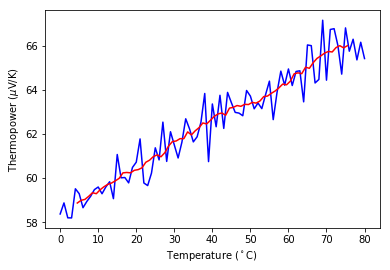

In [44]:
plt.plot(Temp,Thermopower,'-b') #plot original data
plt.plot(movingaverage(Temp,10),movingaverage(Thermopower,10),'-r') #plot filtered data
plt.xlabel('Temperature ($^\circ$C)') #label horizontal axis
plt.ylabel('Thermopower ($\mu$V/K)');#label vertical axis

#### <span style="color: red"> Task 8:</span> Apply an unweighted moving average of window length 20 to the thermocouple data.

Plot the original and the filtered data on the same axes.

The figure you obtain should look like this:
<figure>
<img src="Figures/02_T8.jpeg" width='400'>
</figure>

The filtered data now looks very close to a straight line, indicating that the linear model fitted in the first part of this notebook was a sensible choice; however, since we have applied such a heavy filter, we have lost a lot of information from either end of the data set. In general, data smoothing should only be used for presentation purposes - extreme care is required if you wish to fit, or calculate statistics from, smoothed data.

A weighted moving average works in a very similar way, but rather than giving equal weight to all of its neighbours at each data point, it might place more weight on the data point it is centred on. So our list of $(a,b,c,d,e)$ might become

$$\left(\frac{a}{4}+\frac{b}{2}+\frac{c}{4},\frac{b}{4}+\frac{c}{2}+\frac{d}{4},\frac{c}{4}+\frac{d}{2}+\frac{e}{4}\right).$$

An implementation of this moving average is as follows:

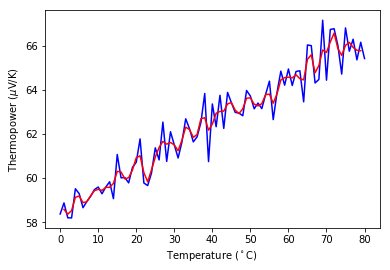

In [46]:
def weightedmovingaverage(values,weights): #define a function called movingaverage that has arguments called values and weights
    smas = np.convolve(values,weights,'valid') #convolve the data with the weights
    return smas #output the filtered data

plt.plot(Temp,Thermopower,'-b') #plot original data
plt.plot(weightedmovingaverage(Temp,[1/4,1/2,1/4]),weightedmovingaverage(Thermopower,[1/4,1/2,1/4]),'-r') #plot filtered data
plt.xlabel('Temperature ($^\circ$C)') #label horizontal axis
plt.ylabel('Thermopower ($\mu$V/K)');#label vertical axis

This time, instead of taking a window length as an argument, the function takes a vector of weights. It is essential that the entries of this vector sum to one.

#### <span style="color: red"> Task 9:</span> Apply a weighted moving average to the thermocouple data with the following weight vector: $(1/10,1/5,2/5,1/5,1/10)$.

Plot the original and the filtered data on the same axes.

The figure you obtain should look like this:
<figure>
<img src="Figures/02_T9.jpeg" width='400'>
</figure>

### Gaussian filters

Gaussian filters work in a similar way to weighted moving averages, but the values of the weights are determined by a Gaussian distribution function. The <code>gaussian_filter</code> takes the data you are interested in smoothing as its first argument and the standard deviation $\sigma$ of the Gaussian distribution function you want to use as its second argument. The higher the value of $\sigma$, the stronger the smoothing will be. This type of data smoothing is often used in image processing.

Here we apply a Gaussian filter with standard deviation 2 to the thermocouple data:

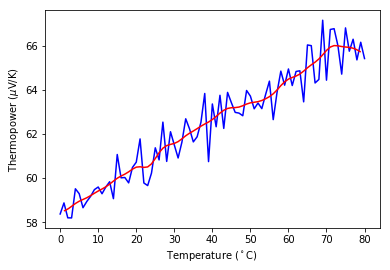

In [48]:
from scipy.ndimage.filters import gaussian_filter #import the Gaussian filter functionality

plt.plot(Temp,Thermopower,'-b') #plot original data
plt.plot(gaussian_filter(Temp,2),gaussian_filter(Thermopower,2),'-r') #plot filtered data
plt.xlabel('Temperature ($^\circ$C)') #label horizontal axis
plt.ylabel('Thermopower ($\mu$V/K)');#label vertical axis

#### <span style="color: red"> Task 10:</span> Apply a Gaussian filter with standard deviation 10 to the thermocouple data.

Plot the original and the filtered data on the same axes.

The figure you obtain should look like this:
<figure>
<img src="Figures/02_T10.jpeg" width='400'>
</figure>

#### Applying a Gaussian filter to an image

As mentioned above, Gaussian filters are often used in image processing. Due to the smoothing effect, this causes an image to be blurred and softens hard edges:

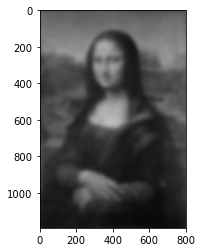

In [50]:
import scipy.ndimage as ndimage #import image functionality

img = ndimage.imread('Figures/Mona_Lisa.jpg') #read image
img2 = ndimage.gaussian_filter(img,10) #blur image using gaussian filter with sigma=10
plt.imshow(img2); #show blurred image